In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
#reading excel file
df = pd.read_excel("/content/BetterLifeIndex.xlsx")

In [3]:
df

,Country,hnw,ls
0,Australia,427064,7.3
1,Austria,308325,7.1
2,Belgium,386006,6.9
3,Canada,423849,7.4
4,Chile,100967,6.5
5,Colombia,..,6.3
6,Czech Republic,..,6.7
7,Denmark,118637,7.6
8,Estonia,159373,5.7
9,Finland,200827,7.6


In [4]:
#df2 =df
#replacing .. entries in df with mean
mean = df[df['hnw'] != ".."].mean()
print(mean)
df["hnw"] = df["hnw"].replace(".." , mean[0])
print(df)

hnw    288004.724138
ls          6.572414
dtype: float64
               Country            hnw   ls
0            Australia  427064.000000  7.3
1              Austria  308325.000000  7.1
2              Belgium  386006.000000  6.9
3               Canada  423849.000000  7.4
4                Chile  100967.000000  6.5
5             Colombia  288004.724138  6.3
6       Czech Republic  288004.724138  6.7
7              Denmark  118637.000000  7.6
8              Estonia  159373.000000  5.7
9              Finland  200827.000000  7.6
10              France  280653.000000  6.5
11             Germany  259667.000000  7.0
12              Greece  150134.000000  5.4
13             Hungary  104458.000000  5.6
14             Iceland  288004.724138  7.5
15             Ireland  217130.000000  7.0
16              Israel  288004.724138  7.2
17               Italy  279889.000000  6.0
18               Japan  305878.000000  5.9
19               Korea  285980.000000  5.9
20              Latvia   70160.000000  5

In [5]:
#dropping NA rows from df
df1 = df.dropna()
print(df1)

               Country            hnw   ls
0            Australia  427064.000000  7.3
1              Austria  308325.000000  7.1
2              Belgium  386006.000000  6.9
3               Canada  423849.000000  7.4
4                Chile  100967.000000  6.5
5             Colombia  288004.724138  6.3
6       Czech Republic  288004.724138  6.7
7              Denmark  118637.000000  7.6
8              Estonia  159373.000000  5.7
9              Finland  200827.000000  7.6
10              France  280653.000000  6.5
11             Germany  259667.000000  7.0
12              Greece  150134.000000  5.4
13             Hungary  104458.000000  5.6
14             Iceland  288004.724138  7.5
15             Ireland  217130.000000  7.0
16              Israel  288004.724138  7.2
17               Italy  279889.000000  6.0
18               Japan  305878.000000  5.9
19               Korea  285980.000000  5.9
20              Latvia   70160.000000  5.9
21           Lithuania  288004.724138  5.9
22         

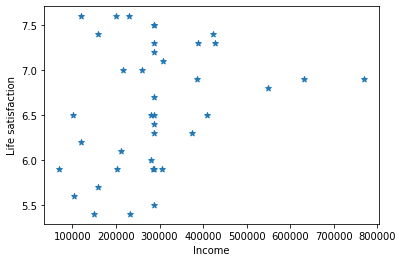

In [6]:
#giving label to x axis
plt.xlabel("Income")
#giving label to y axis
plt.ylabel("Life satisfaction")
#plotting a scatterplot graph using matplotlib
plt.scatter(df1.hnw, df1.ls, marker="*")


In [7]:
#assigning variables to income and life satisfaction
x=df1[["hnw"]]
y=df1[['ls']]

#making a linear regression model named as model
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [8]:
#getting r^2 value
r_sq =model.score(x,y)
print("R^2 is ", r_sq)

#obtaining intercept and coefficient
print("intercept b0: ", model.intercept_)
print("slope b1: ", model.coef_)

#getting estimated value of y
ypred = model.predict(x)
print(ypred)

df1['pred_ls']=ypred
print(df1)


R^2 is  0.0706099035026736
intercept b0:  [6.22670502]
slope b1:  [[1.29614185e-06]]
[[6.78024055]
 [6.62633796]
 [6.72702355]
 [6.77607345]
 [6.35757258]
 [6.6       ]
 [6.6       ]
 [6.38047541]
 [6.43327504]
 [6.4870053 ]
 [6.59047112]
 [6.56327029]
 [6.42129998]
 [6.36209741]
 [6.6       ]
 [6.5081363 ]
 [6.6       ]
 [6.58948087]
 [6.6231663 ]
 [6.59737567]
 [6.31764234]
 [6.6       ]
 [7.2235068 ]
 [6.6       ]
 [6.43126732]
 [6.73027428]
 [6.52343855]
 [6.50017929]
 [6.52827316]
 [6.38184802]
 [6.48987885]
 [6.71087622]
 [6.6       ]
 [6.6       ]
 [6.6       ]
 [6.93749884]
 [7.04599629]
 [6.75601825]
 [6.6       ]]
               Country            hnw   ls   pred_ls
0            Australia  427064.000000  7.3  6.780241
1              Austria  308325.000000  7.1  6.626338
2              Belgium  386006.000000  6.9  6.727024
3               Canada  423849.000000  7.4  6.776073
4                Chile  100967.000000  6.5  6.357573
5             Colombia  288004.724138  6.3  6.6000

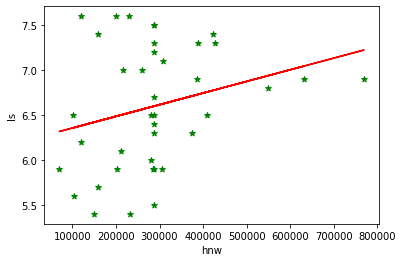

In [9]:
plt.xlabel("hnw")
plt.ylabel("ls")
plt.scatter(df1.hnw, df1.ls, color='green', marker='*')
plt.plot(df1.hnw, df1.pred_ls, color='red')

In [10]:
#This is the intercept that has to be added to create the model
x = sm.add_constant(x)

#create the model
modelNew = sm.OLS(y, x)

#fit the model
fitted = modelNew.fit()

#get results of regression
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ls   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.811
Date:                Sun, 09 Jan 2022   Prob (F-statistic):              0.102
Time:                        08:52:49   Log-Likelihood:                -38.833
No. Observations:                  39   AIC:                             81.67
Df Residuals:                      37   BIC:                             84.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2267      0.247     25.177      0.000       5.726       6.728
hnw         1.296e-06   7.73e-07      1.677      0.102    -2.7e-07    2.86e-06
==============================================================================
Omnibus:                        4.628   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.950
Skew:                           0.165   Prob(JB):                        0.377
Kurtosis:                       1.955   Cond. No.                     7.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#calculate sse
sse = np.sum((fitted.fittedvalues - df1.ls)**2)
print("SSE =", sse)


#calculate ssr
ssr = np.sum((fitted.fittedvalues - df1.ls.mean())**2)
print("SSR = ", ssr)



#calculate sst
sst = ssr + sse
print("SST = ", sst)

SSE = 16.729021736951875
SSR =  1.2709782630481297
SST =  18.000000000000004


ANOVA table

In [13]:
from statsmodels.formula.api import ols 
model = ols("df['ls'] ~ C(df['hnw'])", data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(df['hnw']),13.803028,29.0,0.633151,0.842337
Residual,8.269167,11.0,NaN,NaN


Is there sufficient evidence to indicate that life satisfaction if linearly related to the amount of
household net income?” Use α=0.5

In [15]:
import scipy
#define F-test function
def f_test(x, y):
  x = np.array(x)
  y = np.array(y)
  f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic
  dfn = x.size-1 #define degrees of freedom numerator
  dfd = y.size-1 #define degrees of freedom denominator
  p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
  return f, p

#perform F-test
f_test(df1['hnw'], df1['ls'])


(42030112575.54407, 1.1102230246251565e-16)

Since this p-value is greater than 0.05, we would accept the null hypothesis. Hence, we have
sufficient evidence to say that the life satisfaction is linearly related to household net income.


**Conclusion:**
Successfully learnt how to perform hypothesis testing for simple linear regression and performed the same on "Better Life Index" dataset.